In [45]:
import plotnine as p9
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

from plotnine_prism import *

In [16]:
time_df = pd.read_csv("run_time.csv")
#time_df["train"] = time_df["train"] / 100
#time_df["overall"] = time_df.apply(lambda x: x.prepare_input_for_model + x.train + x.compute_spot_representations, axis=1)

In [49]:
time_df

,n_points,prepare_input_for_model,train,compute_spot_representations
0,1000000,972.303031,30598.516605,455.827048
1,500000,522.626580,17743.997472,209.009147
2,400000,501.452208,13985.849240,163.425003
3,200000,241.831518,5978.024448,80.747581
4,100000,116.095898,2878.493767,42.976844
5,50000,66.861429,1455.005701,21.945747
6,10000,30.569235,267.965359,4.595566
7,5000,27.638978,131.698615,4.657365


In [67]:
rename_dict = {"prepare_input_for_model": "Grid building",
              "train": "Train (100 epochs)",
              "compute_spot_representations": "Inference"}

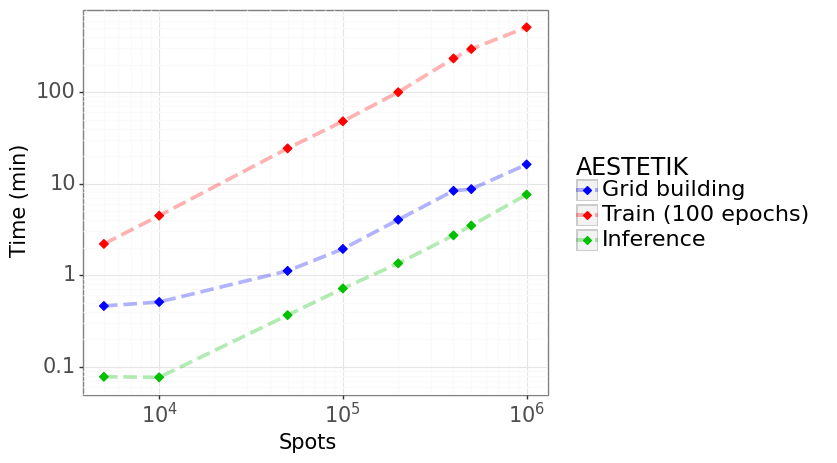

<ggplot: (1412251137238)>

In [76]:
to_plot = time_df.melt(["n_points"], var_name="function", value_name="seconds")
to_plot["function"] = to_plot["function"].apply(lambda x: rename_dict[x])
to_plot["function"] = pd.Categorical(to_plot["function"], rename_dict.values())
to_plot["minutes"] = to_plot["seconds"] / 60
to_plot["hours"] = to_plot["minutes"] / 60

(p9.ggplot(to_plot, p9.aes("n_points", "minutes", color="function", group="function")) 
 + p9.geom_point(size=2, shape="D") 
 + p9.geom_line(linetype="--", size=1.5, alpha=0.3)
 + p9.theme_bw()
 #+ p9.scale_x_log10()
 + p9.scale_y_log10()
 + p9.xlab("Spots")
 + p9.ylab("Time (min)")
 + scale_color_prism(palette = "colors")
 + p9.scale_x_continuous(name='Spots', trans='log10', 
                         breaks=[10000, 100000, 1000000], 
                         labels=['$10^4$', '$10^5$', '$10^6$'])
 + p9.theme(subplots_adjust={'wspace': 0}, figure_size=(6, 5),
            text=p9.element_text(size=15),
            strip_text=p9.element_text(size=17),
            legend_title=p9.element_text(size=17),
            legend_text=p9.element_text(size=16))
 + p9.guides(color=p9.guide_legend(title="AESTETIK"))
)